# 导入库

In [1]:
# encoding: UTF-8
import re
import os
from numpy import argmax
from numpy import *
import scipy.io as sio
import numpy as np
import random 

import tensorflow as tf 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
import matplotlib.pyplot as plt

from PIL import Image

# 数据集路径

In [2]:
positive_training_data = "data\\positive_training_dataset.txt"
negative_training_data = "data\\negative_training_dataset.txt" 
positive_testing_data = "data\\positive_testing_dataset.txt" 
negative_testing_data = "data\\negative_testing_dataset.txt"#数据集的路径

# 1、提取数据集中的RNA序列

In [ ]:
def RNA_to_feature(str_rna): 
#此函数将输入的RNA及其二级结构转化为输入的特征值 

    rna, structure = '',''    
    #初始化RNA和二级结构的数组 
    for i in range(len(str_rna)): 
        #这个循环用来保证二级结构和编码同样长度，同时避免混入非RNA编码 
        if str_rna[i] is not 'A' and str_rna[i] is not 'C' and str_rna[i] is not 'G' and str_rna[i] is not 'U': 
            continue 
        rna += str_rna[i] 
        
        
    return rna

In [ ]:

def txt2mat(txt_path,savefile):# ,targets):
#数据读取函数 
    dataset={}
    with open(txt_path) as data: 
        #打开文件 
        k = 0
        
        form_x = [] 
        fp = data.readlines() 
        print(len(fp))
        for i in range(0, len(fp), 3): 
            #每次跳三个读取 
            
            d=RNA_to_feature(fp[i + 1])
            #将奇数行（RNA编码）和偶数行（二级结构）一同输入，一起进行转换
            encoded = list(d)
            
            #encoded = np.array(d)
            
            #print(d,encoded)
            
            dataset[str(k)]= encoded
            k += 1
        sio.savemat(savefile,dataset) 
    



In [ ]:
data1 = sio.loadmat('data\\test_wrong.mat')
# X = data1['data']
# Y = data1['target']
# print(len(X))
print(data1['123'][0])

# 3、对提取出的RNA序列进行2位二进制编码

In [ ]:

def Seg2Bin(segfile, savefile ,targets):
    num_list=[]
    data = sio.loadmat(segfile)
    X = data
    Y = []
    print(len(X))
    
#     #定义蛋白质编码模型
#     dict = { 'P':'00001', 'Q': '00100', 'R': '00110', 'Y': '01100', 'W': '01110',
#             'T': '10000', 'M': '10011', 'N': '10101', 'V': '11010', 'E': '11101',
#             'L': '00011', 'H': '00101', 'S': '01001', 'F': '01011', 'C': '01111',
#             'I': '10010', 'K': '10100', 'A': '11001', 'D': '11100', 'G': '11110', 'X': '00000'} #将乱码X设为00000

    
    #定义RNA编码模型
    dict = { 'A':'00', 'U': '01', 'G': '10', 'C': '11'} #将乱码X设为000
   
    XX=np.ndarray(shape=(len(X)-3,1),dtype='S500')

    for i in range(len(X)-3):
        bin_=''
        #print(len(X[str(i)]))
        num_list.append(len(X[str(i)]))
        #list.insert(index, obj)
        
        #print(len(X[str(i)]))
        for j in range(len(X[str(i)])):
            
            stra=str(dict[X[str(i)][j]]) #将编码转化为字符串
            
            bin_ = bin_ + stra
        
        '''对二进制编码进行截取，长度大于240去除，小于300补0
        
        if len(bin_)<=240:
            bin_=bin_.ljust(240,'0')
        else:
            bin_=bin_[0:240]'''
            
        #print(bin_)    
        XX[i,0]=bin_
        Y.append(targets)
        
                          
    dataset1={}
    dataset1['data']=XX
    dataset1['target'] = Y
    sio.savemat(savefile,dataset1)
    
    plt.bar(range(len(num_list)), num_list)
    plt.show()
                          
                          



In [ ]:
positive_target = [0,1]
negativ_target = [1,0]
 
Seg2Bin('data\\train_correct.mat','data\\train_correct_Bin.mat' ,positive_target)


In [ ]:
data1 = sio.loadmat('data\\train_correct_Bin.mat')
X = data1['data']
Y = data1['target']
print(len(X))
print(X[483])

In [ ]:
abc='hhhhhhhhhhhhhh'

if len(abc)<=5:
    abc=abc.ljust(300,'0')
else:
    abc=abc[0:5]
print(abc)

# 测试：单条序列元胞自动机演化

In [ ]:
# 
rule_84_nb = ['111','110','101','100','011','010','001','000']  
rule_84_bit = ['0',  '1',  '0',  '1',  '0',  '1',  '0',  '0']  #84代表二进制 010100100
#
bbbb=X[0]
ab=bbbb[len(bbbb)-1]+bbbb+bbbb[0]  #演化规则：将最后一位补到头部，第一位补到尾部 则长度为115+2=117
#bbbb[0:115]
#ab[0:117]

print('',bbbb)
print(ab)
new_ab=''
for k in range(len(ab)-2):
    nb = ab[k:k+3]  #滑窗得到邻居
    index_= rule_84_nb.index(nb)
    rule_bit = rule_84_bit[index_]
    new_ab = new_ab + rule_bit
print(nb)
print(index_,rule_bit)
print(new_ab)


# 4.1 元胞自动机演化模型

In [ ]:
rule_84_nb = ['111','110','101','100','011','010','001','000']  
rule_84_bit = ['0',  '1',  '0',  '1',  '0',  '1',  '0',  '0']
def Cellular_Automata(stra):

    xs=stra
    ab=xs[len(xs)-1]+xs+xs[0]  #演化规则：将最后一位补到头部，第一位补到尾部 则长度为115+2=117
    
    #xs[0:115]
    #ab[0:117]
    new_ab=''
    
    for k in range(len(ab)-2):
        nb = ab[k:k+3]  #滑窗得到邻居
        index_= rule_84_nb.index(nb)
        rule_bit = rule_84_bit[index_]
        new_ab = new_ab + rule_bit
    
    return new_ab



# 4.2 对二进制序列进行元胞自动机处理

In [ ]:
def Bin2Cellauto(binfile,epochs,savefile):
    
    data1 = sio.loadmat(binfile)
    X = data1['data']
    #Y = data1['target']
    dataset={}
    XSS=[]
    epoch=epochs #定义迭代次数
    t = 0
    for k in range(len(X)):
        bin_2=X[k,0]
        #print(len(bin_2))
        XS=np.zeros(shape=(epoch,len(bin_2)), dtype=np.int16)

        cellauto_bin=bin_2
        
        for j in range(epoch): 

            cellauto_bin = Cellular_Automata(cellauto_bin)
            result = list(cellauto_bin)   
            results = np.array(result, dtype=np.int16) #将list中的字符型转变为数值型
#             if j>399 :
            
            XS[j]=results
        
        dataset[str(t)]=XS
        #print(cellauto_bin)

        #XSS.insert(t,XS)
        t+=1

    
    #dataset['data']=XSS
    #dataset['target'] = Y
    sio.savemat(savefile,dataset)
    #return XSS


In [ ]:
Bin2Cellauto('data\\train_correct_Bin.mat',100,'data\\train_correct_Cellauto_100.mat')


In [ ]:
data1 = sio.loadmat('data\\train_correct_Cellauto_100.mat')
X = data1['0']
print(X.shape)

In [ ]:
def data_process(): 

    #正样本训练集
    txt2mat(positive_training_data,'data\\train_correct.mat')# ,positive_target) 
    
    #负样本训练集
    txt2mat(negative_training_data,'data\\train_wrong.mat')# ,negativ_target) 
    
    #正样本测试集
    txt2mat(positive_testing_data,'data\\test_correct.mat')# ,positive_target) 
    
    #负样本测试集
    txt2mat(negative_testing_data,'data\\test_wrong')# ,negativ_target) 
    print('序列文件已保存！')
    
    positive_target = [0,1]
    negativ_target = [1,0]
    Seg2Bin('data\\train_correct.mat','data\\train_correct_Bin.mat' ,positive_target)
    Seg2Bin('data\\train_wrong.mat','data\\train_wrong_Bin.mat' ,negativ_target)
    Seg2Bin('data\\test_correct.mat','data\\test_correct_Bin.mat' ,positive_target)
    Seg2Bin('data\\test_wrong.mat','data\\test_wrong_Bin.mat' ,negativ_target)
    
    Bin2Cellauto('data\\train_correct_Bin.mat',100,'data\\train_correct_Cellauto_100.mat')
    Bin2Cellauto('data\\train_wrong_Bin.mat',100,'data\\train_wrong_Cellauto_100.mat')
    Bin2Cellauto('data\\test_correct_Bin.mat',100,'data\\test_correct_Cellauto_100.mat')
    Bin2Cellauto('data\\test_wrong_Bin.mat',100,'data\\test_wrong_Cellauto_100.mat')
    

In [ ]:
data_process()

In [ ]:
data2 = sio.loadmat('data\\train_correct_Cellauto_100.mat')
X2 = data2['data']
Y2 = data2['target']


In [ ]:

X2[57347,0:3]

# 5、生成图片

In [3]:
from skimage import transform,data
import matplotlib.pyplot as plt

data=sio.loadmat('data\\train_correct_Cellauto_100.mat')

#print(data)
# N = d.shape[0]
for i in range(484):
    
    img1 = Image.fromarray(data[str(i)]*255,'L')
    
    img1.save('data\\train_correct\\' + str(i) + '.jpg','jpeg')
    
    dst1=transform.resize(data[str(i)], (32, 32))
    dst1 = Image.fromarray(dst1,'L')
    dst1.save('data\\train_correct_resize\\' + str(i) + '.jpg','jpeg')

D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [5]:


data1=sio.loadmat('data\\train_wrong_Cellauto_100.mat')

#print(data)
# N = d.shape[0]
for i in range(484):
    
    img2 = Image.fromarray(data1[str(i)]*255,'L')
    img2.save('data\\train_wrong\\' + str(i) + '.jpg','jpeg')
    
    
    dst2=transform.resize(data1[str(i)], (32, 32))
    dst2 = Image.fromarray(dst2,'L')   
    dst2.save('data\\train_wrong_resize\\' + str(i) + '.jpg','jpeg')

D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [6]:


data2=sio.loadmat('data\\test_correct_Cellauto_100.mat')

#print(data)
# N = d.shape[0]
for i in range(124):
    
    img3 = Image.fromarray(data2[str(i)]*255,'L')
    img3.save('data\\test_correct\\' + str(i) + '.jpg','jpeg')
    
    dst3=transform.resize(data2[str(i)], (32, 32))
    dst3 = Image.fromarray(dst3,'L')   
    dst3.save('data\\test_correct_resize\\' + str(i) + '.jpg','jpeg')

D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [7]:


data3=sio.loadmat('data\\test_wrong_Cellauto_100.mat')

#print(data)
# N = d.shape[0]
for i in range(124):
    
    img4 = Image.fromarray(data3[str(i)]*255,'L')
    img4.save('data\\test_wrong\\' + str(i) + '.jpg','jpeg')
    
    dst4=transform.resize(data3[str(i)], (32, 32))
    dst4 = Image.fromarray(dst4,'L')   
    dst4.save('data\\test_wrong_resize\\' + str(i) + '.jpg','jpeg')

D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


# 修改图片测试

D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


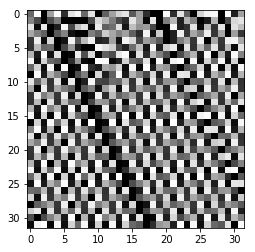

In [36]:
from skimage import transform,data
import matplotlib.pyplot as plt
data=sio.loadmat('train_wrong_Cellauto_100.mat')
a=data['310']
img = a

dst=transform.resize(img, (32, 32))
plt.figure('resize')
plt.imshow(dst,plt.cm.gray)

dst = Image.fromarray(dst,'L')


dst.save('resize111.jpg','jpeg')

D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


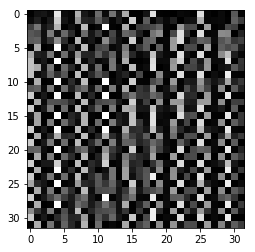

In [29]:
from skimage import transform,data
import matplotlib.pyplot as plt
img=Image.open('train_correct\\410.jpg')
#train_wrong

img = np.array(img)
plt.imshow(img,plt.cm.gray)
dst=transform.resize(img, (32, 32))

#new_img=img.resize((32,32),Image.BILINEAR)
#dst=transform.resize(img, (32, 32))
#new_img.save('resize_.jpg','jpeg')

# plt.figure('resize')
plt.imshow(dst,plt.cm.gray)



In [ ]:
from PIL import Image
img1 = Image.open('train_wrong\\1.jpg')
img1=img1.resize((32,32))
img1.show()